<a href="https://colab.research.google.com/github/AngadSinghLamba/Cohort-Analysis/blob/main/Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cohort Analysis: Process We Can Follow
Cohort analysis is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable way. Below is the process we can follow for the task of Cohort Analysis:

1. The first step is to define the cohorts based on a specific characteristic or event. For example, in an e-commerce platform, cohorts could be defined based on the month of a user’s first purchase.
2. Gather relevant data for analysis.
3. Determine the time intervals you want to analyze.
4. Group users into cohorts based on the defined characteristic or event.
5. Choose the key performance metrics you want to analyze.
6. Calculate the chosen metrics for each cohort over the specified time periods.
7. Create visualizations to present your findings effectively.


A dataset for Cohort Analysis typically includes user or customer data, such as registration date, purchase history, engagement metrics, or any other data points relevant to the analysis.


##Cohort Analysis using Python
Now, let’s get started with the task of Cohort Analysis by importing the necessary Python libraries and the dataset
/content/drive/MyDrive/Cohort Analysis 29.12.2023 /cohorts.csv

---



In [20]:
# prompt: %matplotlib inline shall i import this before matplotlib or later

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [38]:
data=pd.read_csv("drive/MyDrive/Cohort Analysis 29.12.2023 /cohorts.csv")
data.head()


,Date,New users,Returning users,Duration Day 1,Duration Day 7
0,25/10/2023,3461,1437,202.156977,162.523809
1,26/10/2023,3777,1554,228.631944,258.147059
2,27/10/2023,3100,1288,227.185841,233.550000
3,28/10/2023,2293,978,261.079545,167.357143
4,29/10/2023,2678,1082,182.567568,304.350000


Now, let’s have a look at whether the dataset has any null values or not:

In [22]:
missing_values = data.isnull().sum()
print(missing_values)

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64


Now, let’s have a look at the datatypes of all the columns in the data:



In [23]:
data_types = data.dtypes
print(data_types)

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object


The Date column is in object (string) format. For effective analysis, especially in cohort analysis, we should convert this to a datetime format:

In [40]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')


,Date,New users,Returning users,Duration Day 1,Duration Day 7
0,2023-10-25,3461,1437,202.156977,162.523809
1,2023-10-26,3777,1554,228.631944,258.147059
2,2023-10-27,3100,1288,227.185841,233.550000
3,2023-10-28,2293,978,261.079545,167.357143
4,2023-10-29,2678,1082,182.567568,304.350000
5,2023-10-30,3748,1532,240.543956,210.900000
6,2023-10-31,3943,1603,184.194444,223.463415
7,2023-11-01,3568,1538,154.312925,180.655172
8,2023-11-02,3871,1540,188.531250,223.137931
9,2023-11-03,3772,1545,189.689394,81.705882


#Now, let’s have a look at the descriptive statistics of the dataset:

In [41]:
# Display the descriptive statistics of the dataset
descriptive_stats = data.describe()
print(descriptive_stats)

         New users  Returning users  Duration Day 1  Duration Day 7
count    30.000000        30.000000       30.000000       30.000000
mean   3418.166667      1352.866667      208.259594      136.037157
std     677.407486       246.793189       64.730830       96.624319
min    1929.000000       784.000000       59.047619        0.000000
25%    3069.000000      1131.500000      182.974287       68.488971
50%    3514.500000      1388.000000      206.356554      146.381667
75%    3829.500000      1543.750000      230.671046      220.021875
max    4790.000000      1766.000000      445.872340      304.350000


The descriptive statistics provide the following insights:

- **New Users:** The average number of new users is around 3,418 with a standard deviation of approximately 677. The minimum and maximum new users recorded are 1,929 and 4,790, respectively.

This indicates that the durations of engagement for new users on their first day tend to be somewhat consistent or clustered closer to the average duration of around 208 (measured in some unit of time). The values are spread out over a narrower range around this average, showing less variability.



- **Returning Users:** On average, there are about 1,353 returning users, with a standard deviation of around 247. The minimum and maximum are 784 and 1,766, respectively.

In contrast, the durations of engagement for users returning after seven days show a higher standard deviation. This means that the durations on the seventh day after initial interaction vary more widely around the average duration of approximately 136 (measured in the same unit of time). In other words, some users might have significantly longer engagement times, while others have much shorter durations on this specific day compared to the average.

So, the higher standard deviation for Duration Day 7 compared to Duration Day 1 suggests that there's more variability or dispersion in the durations of engagement for returning users after seven days, indicating a wider range of engagement behaviors on that particular day.

- **Duration Day 1:** The average duration on the first day is about 208 seconds with a considerable spread (standard deviation is around 65).
- **Duration Day 7:** The average 7-day duration is lower, around 136 seconds, with a larger standard deviation of about 97. The range is from 0 to 304.










#Now, let’s have a look at the trend of the new and returning users over time:



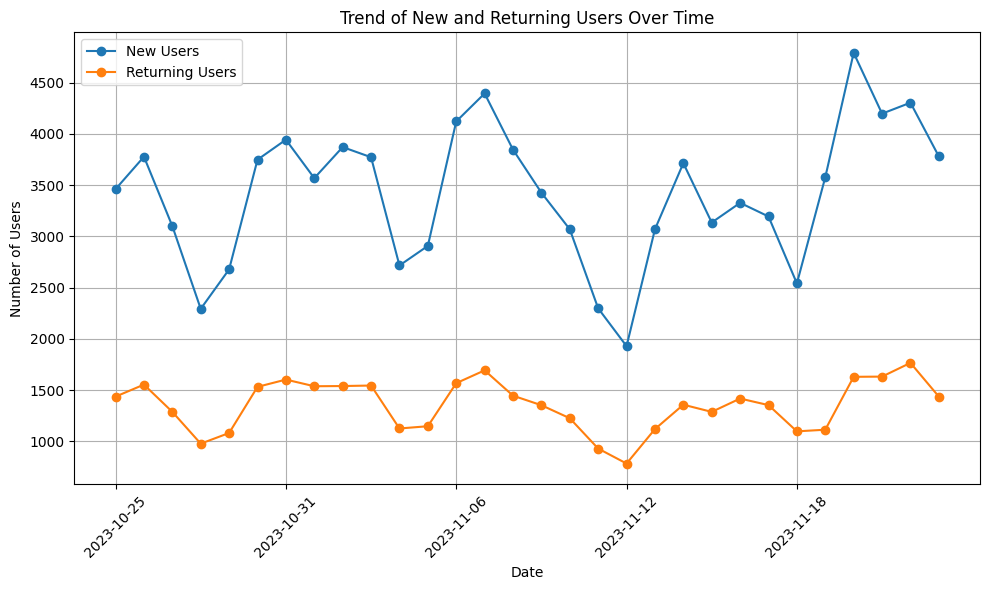

In [42]:
import matplotlib.pyplot as plt

# Assuming 'data' contains the Date, New users, and Returning users columns

# Plotting the trend for New and Returning Users
plt.figure(figsize=(10, 6))

# New Users
plt.plot(data['Date'], data['New users'], marker='o', label='New Users')

# Returning Users
plt.plot(data['Date'], data['Returning users'], marker='o', label='Returning Users')

# Adding title and labels
plt.title('Trend of New and Returning Users Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()

dates_to_show = data['Date'][::6]
plt.xticks(dates_to_show,  rotation=45)

plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()




The descriptive statistics provide the following insights:

- **New Users:** The average number of new users is around 3,418 with a standard deviation of approximately 677. The minimum and maximum new users recorded are 1,929 and 4,790, respectively.

This indicates that the durations of engagement for new users on their first day tend to be somewhat consistent or clustered closer to the average duration of around 208 (measured in some unit of time). The values are spread out over a narrower range around this average, showing less variability.



- **Returning Users:** On average, there are about 1,353 returning users, with a standard deviation of around 247. The minimum and maximum are 784 and 1,766, respectively.

In contrast, the durations of engagement for users returning after seven days show a higher standard deviation. This means that the durations on the seventh day after initial interaction vary more widely around the average duration of approximately 136 (measured in the same unit of time). In other words, some users might have significantly longer engagement times, while others have much shorter durations on this specific day compared to the average.

So, the higher standard deviation for Duration Day 7 compared to Duration Day 1 suggests that there's more variability or dispersion in the durations of engagement for returning users after seven days, indicating a wider range of engagement behaviors on that particular day.

- **Duration Day 1:** The average duration on the first day is about 208 seconds with a considerable spread (standard deviation is around 65).
- **Duration Day 7:** The average 7-day duration is lower, around 136 seconds, with a larger standard deviation of about 97. The range is from 0 to 304.










#Now, let’s have a look at the trend of the new and returning users over time:

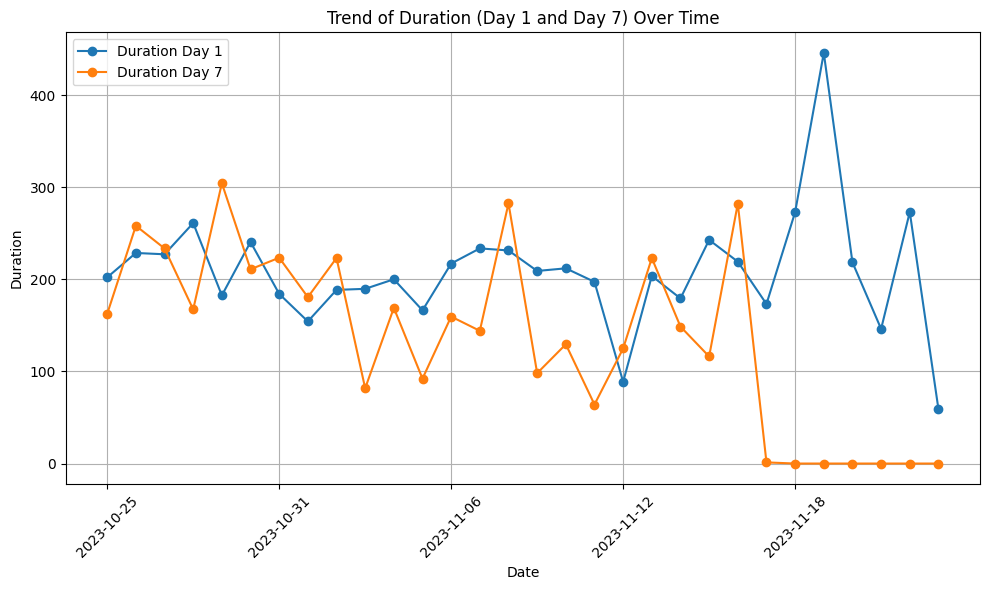

In [43]:

# Assuming 'data' contains the Date, Duration Day 1, and Duration Day 7 columns

plt.figure(figsize=(10, 6))

# Plotting the trend for Duration Day 1
plt.plot(data['Date'], data['Duration Day 1'], marker='o', linestyle='-', label='Duration Day 1')

# Plotting the trend for Duration Day 7
plt.plot(data['Date'], data['Duration Day 7'], marker='o', linestyle='-', label='Duration Day 7')

# Adding title and labels
plt.title('Trend of Duration (Day 1 and Day 7) Over Time')
plt.xlabel('Date')
plt.ylabel('Duration')
plt.legend()

dates_to_show = data['Date'][::6]
plt.xticks(dates_to_show,  rotation=45)

plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()







##Now, let’s have a look at the correlation between the variables:



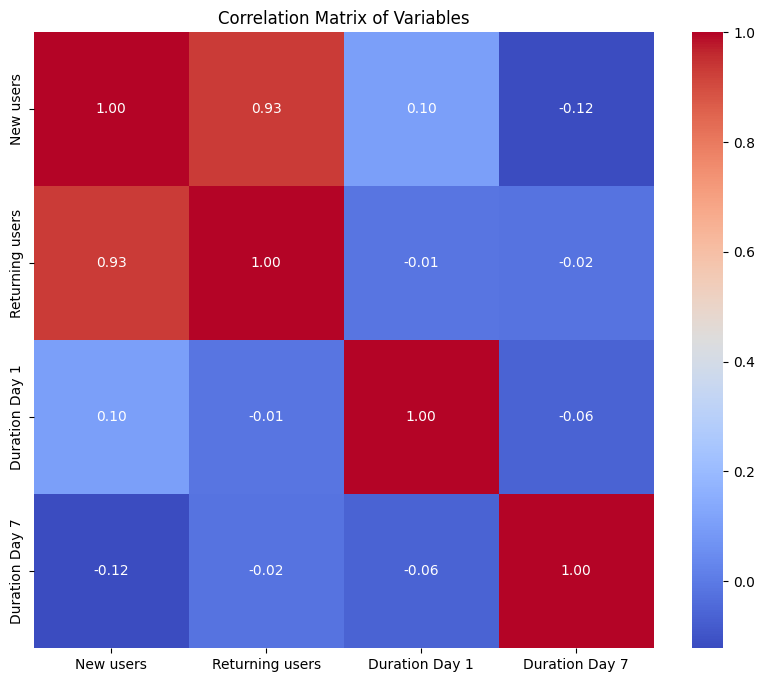

In [44]:
# Correlation matrix
correlation_matrix = data.corr(numeric_only=True)
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

**"New users"** and **"Returning users" **have a strong positive correlation of around **0.93**. This suggests that as the number of new users increases, the number of returning users tends to increase as well.




#Now Here’s How to Perform Cohort Analysis using Python

For the task of Cohort Analysis, we’ll group the data by the week of the year to create cohorts. Then, for each cohort (week), we’ll calculate the average number of new and returning users, as well as the average of Duration Day 1 and Duration Day 7. Let’s start by grouping the data by week and calculating the necessary averages:

In [46]:
# Grouping data by week

data['Week'] = data['Date'].dt.isocalendar().week

# Calculating weekly averages
weekly_averages = data.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()

print(weekly_averages.head())


   Week    New users  Returning users  Duration Day 1  Duration Day 7
0    43  3061.800000      1267.800000      220.324375      225.185602
1    44  3503.571429      1433.142857      189.088881      168.723200
2    45  3297.571429      1285.714286      198.426524      143.246721
3    46  3222.428571      1250.000000      248.123542      110.199609
4    47  4267.750000      1616.250000      174.173330        0.000000


# Now, let’s have a look at the weekly average of the new and returning users and the duration:

In [47]:
import plotly.express as px

fig1 = px.line(weekly_averages, x='Week', y=['New users', 'Returning users'], markers=True,
               labels={'value': 'Average Number of Users'}, title='Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title='Week of the Year')
fig1.update_yaxes(title='Average Number of Users')

fig2 = px.line(weekly_averages, x='Week', y=['Duration Day 1', 'Duration Day 7'], markers=True,
               labels={'value': 'Average Duration'}, title='Weekly Average of Duration (Day 1 vs. Day 7)')
fig2.update_xaxes(title='Week of the Year')
fig2.update_yaxes(title='Average Duration')

fig1.show()
fig2.show()

Now, let’s create a cohort chart to understand the cohort matrix of weekly averages. In the cohort chart, each row will correspond to a week of the year, and each column will represent a different metric:

- Average number of new users.
- Average number of returning users.
- Average duration on Day 1.
- Average duration on Day 7.

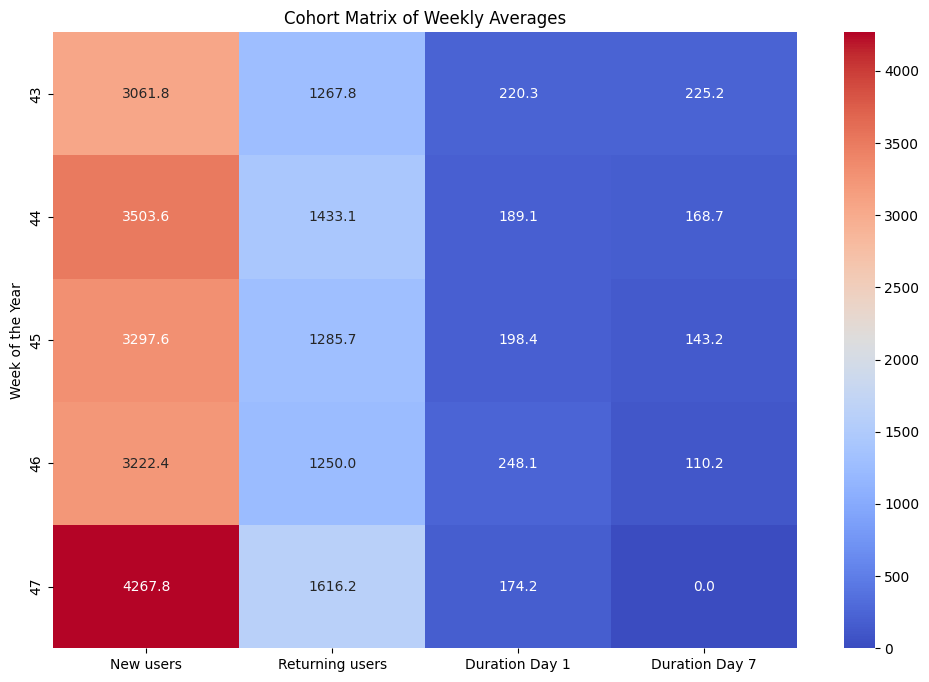

In [48]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()

We can see that the number of new users and returning users fluctuates from week to week. Notably, there was a significant increase in both new and returning users in Week 47. The average duration of user engagement on Day 1 and Day 7 varies across the weeks. The durations do not follow a consistent pattern about the number of new or returning users, suggesting that other factors might be influencing user engagement.



#Summary

Cohort Analysis is a data analysis technique used to gain insights into the behaviour and characteristics of specific groups of users or customers over time. It is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable way.